# Algerian Forest Fires dataset Classification Models

In this notebook:
* basic classification models are used to make predictions about forest fires
* hyperparameter tuning pipelines with cross validation
* comparison between classification results is made

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn import metrics

In [4]:
import warnings
warnings.filterwarnings("ignore")

# The dataset first overview

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

From dataset description:
* The dataset includes 244 instances
* The period from June 2012 to September 2012

Small dataset of one summer season

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 247 entries, ('day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI') to ('30', '09', '2012', '24', '64', '15', '0.2', '67.3', '3.8', '16.5', '1.2', '4.8', '0.5')
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bejaia Region Dataset   245 non-null    object
dtypes: object(1)
memory usage: 49.3+ KB


In [7]:
df.shape

(247, 1)

In [8]:
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [9]:
df[120:130]

,,,,,,,,,,,,,Bejaia Region Dataset
28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


* The *.csv file contains two concatenated parts
* Both parts have row with Region names: 'Bejaia Region Dataset' and 'Sidi-Bel Abbes Region Dataset' and row with column names
* Column names are the same for both parts

Let's delete region names from the dataset and use all 244 observations in one analysis

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv',
                 skiprows=1)

In [11]:
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [12]:
df = df.drop([122,123]).reset_index(drop=True)

In [13]:
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


# Exploratory Data Analysis and Some Cleaning

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [15]:
df.shape

(244, 14)

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

## Column names cleaning

Facts that make EDA slow and a bit difficult:
* Some column names have extra whitespaces
* Some column names are in upper register, some in lower, som in both

Steps:
* stript whitespases in column names
* bring column names to lowercase

In [17]:
df.columns = df.columns.str.strip().str.lower()

In [18]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes'],
      dtype='object')

## Check missing values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   temperature  244 non-null    object
 4   rh           244 non-null    object
 5   ws           244 non-null    object
 6   rain         244 non-null    object
 7   ffmc         244 non-null    object
 8   dmc          244 non-null    object
 9   dc           244 non-null    object
 10  isi          244 non-null    object
 11  bui          244 non-null    object
 12  fwi          244 non-null    object
 13  classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


All values are non null except one <b>classes</b> value

In [20]:
df[df['classes'].isna()]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The closer analysis shows that the <b>classes</b> value isn't missing. It is shifted to <b>fwi</b> column

In [21]:
df[df['classes'].isna()].values

array([['14', '07', '2012', '37', '37', '18', '0.2', '88.9', '12.9',
        '14.6 9', '12.5', '10.4', 'fire   ', nan]], dtype=object)

Column <b>dc</b> has whitespace inside the value: '14.6 9'. Seems that comma is missing there and that's why all next values in the row are shifted

Let's fix this row (while we should change only 5 values in only one row, we'll do it manually):

In [22]:
df.loc[165, ['dc','isi','bui','fwi','classes']] = ['14.6', '9', '12.5', '10.4', 'fire   ']

In [23]:
df.loc[[165]]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire


In [24]:
df[df['classes'].isna()]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   temperature  244 non-null    object
 4   rh           244 non-null    object
 5   ws           244 non-null    object
 6   rain         244 non-null    object
 7   ffmc         244 non-null    object
 8   dmc          244 non-null    object
 9   dc           244 non-null    object
 10  isi          244 non-null    object
 11  bui          244 non-null    object
 12  fwi          244 non-null    object
 13  classes      244 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


No missing values now

## Checking datatypes

In [26]:
df.dtypes

day            object
month          object
year           object
temperature    object
rh             object
ws             object
rain           object
ffmc           object
dmc            object
dc             object
isi            object
bui            object
fwi            object
classes        object
dtype: object

In [27]:
df.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


All values are in object (string) format. Actually they are most numbers

Steps:
* Convert most numeric numbers to int/float datatypes
* Save <b>day, month, year</b> as a string to further convertation to one <b>date</b> column
* Check values of <b>classes</b> column for extra whitespaces
* Change value type for <b>classes</b> column to categorical

## Converting to_numeric

In [28]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes'],
      dtype='object')

In [29]:
df[['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']] = df[['temperature', 'rh', 'ws',
                                                        'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']].apply(pd.to_numeric)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   temperature  244 non-null    int64  
 4   rh           244 non-null    int64  
 5   ws           244 non-null    int64  
 6   rain         244 non-null    float64
 7   ffmc         244 non-null    float64
 8   dmc          244 non-null    float64
 9   dc           244 non-null    float64
 10  isi          244 non-null    float64
 11  bui          244 non-null    float64
 12  fwi          244 non-null    float64
 13  classes      244 non-null    object 
dtypes: float64(7), int64(3), object(4)
memory usage: 26.8+ KB


## Creating date column

In [31]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    object        
 1   month        244 non-null    object        
 2   year         244 non-null    object        
 3   temperature  244 non-null    int64         
 4   rh           244 non-null    int64         
 5   ws           244 non-null    int64         
 6   rain         244 non-null    float64       
 7   ffmc         244 non-null    float64       
 8   dmc          244 non-null    float64       
 9   dc           244 non-null    float64       
 10  isi          244 non-null    float64       
 11  bui          244 non-null    float64       
 12  fwi          244 non-null    float64       
 13  classes      244 non-null    object        
 14  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(4)
mem

In [33]:
df.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,date
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05


In [34]:
df.tail()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,date
239,26,09,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2012-09-26
240,27,09,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2012-09-27
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2012-09-28
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2012-09-29
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2012-09-30


## Checking and cleaning classes column

In [35]:
df['classes'].value_counts()

fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: classes, dtype: int64

In [36]:
df['classes'].value_counts().index

Index(['fire   ', 'not fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '],
      dtype='object')

* There are only 2 classes, but values differ (whitespaces)

Steps:
* strip whitespaces
* convert to categorical

In [37]:
df['classes'] = df['classes'].str.strip()

In [38]:
df['classes'].value_counts()

fire        138
not fire    106
Name: classes, dtype: int64

* Now there are only 2 classes. Let's convert them to category type

In [39]:
df['classes'] = df['classes'].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    object        
 1   month        244 non-null    object        
 2   year         244 non-null    object        
 3   temperature  244 non-null    int64         
 4   rh           244 non-null    int64         
 5   ws           244 non-null    int64         
 6   rain         244 non-null    float64       
 7   ffmc         244 non-null    float64       
 8   dmc          244 non-null    float64       
 9   dc           244 non-null    float64       
 10  isi          244 non-null    float64       
 11  bui          244 non-null    float64       
 12  fwi          244 non-null    float64       
 13  classes      244 non-null    category      
 14  date         244 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(7), int64(3), 

# Statistical and Visual EDA

## Target variable: classes

In [41]:
df['classes'].describe()

count      244
unique       2
top       fire
freq       138
Name: classes, dtype: object

In [42]:
df['classes'].value_counts()

fire        138
not fire    106
Name: classes, dtype: int64

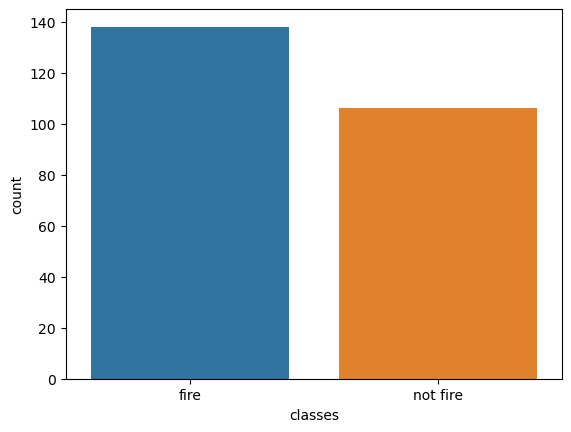

In [44]:
sns.countplot(x='classes', data=df)
plt.show()

* There are 2 unique categories: 'fire', 'not fire'
* The classes are rather balanced

## Numerical variables

In [46]:
df.dtypes

day                    object
month                  object
year                   object
temperature             int64
rh                      int64
ws                      int64
rain                  float64
ffmc                  float64
dmc                   float64
dc                    float64
isi                   float64
bui                   float64
fwi                   float64
classes              category
date           datetime64[ns]
dtype: object

In [47]:
df.select_dtypes(include=['int64', 'float64']).describe()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


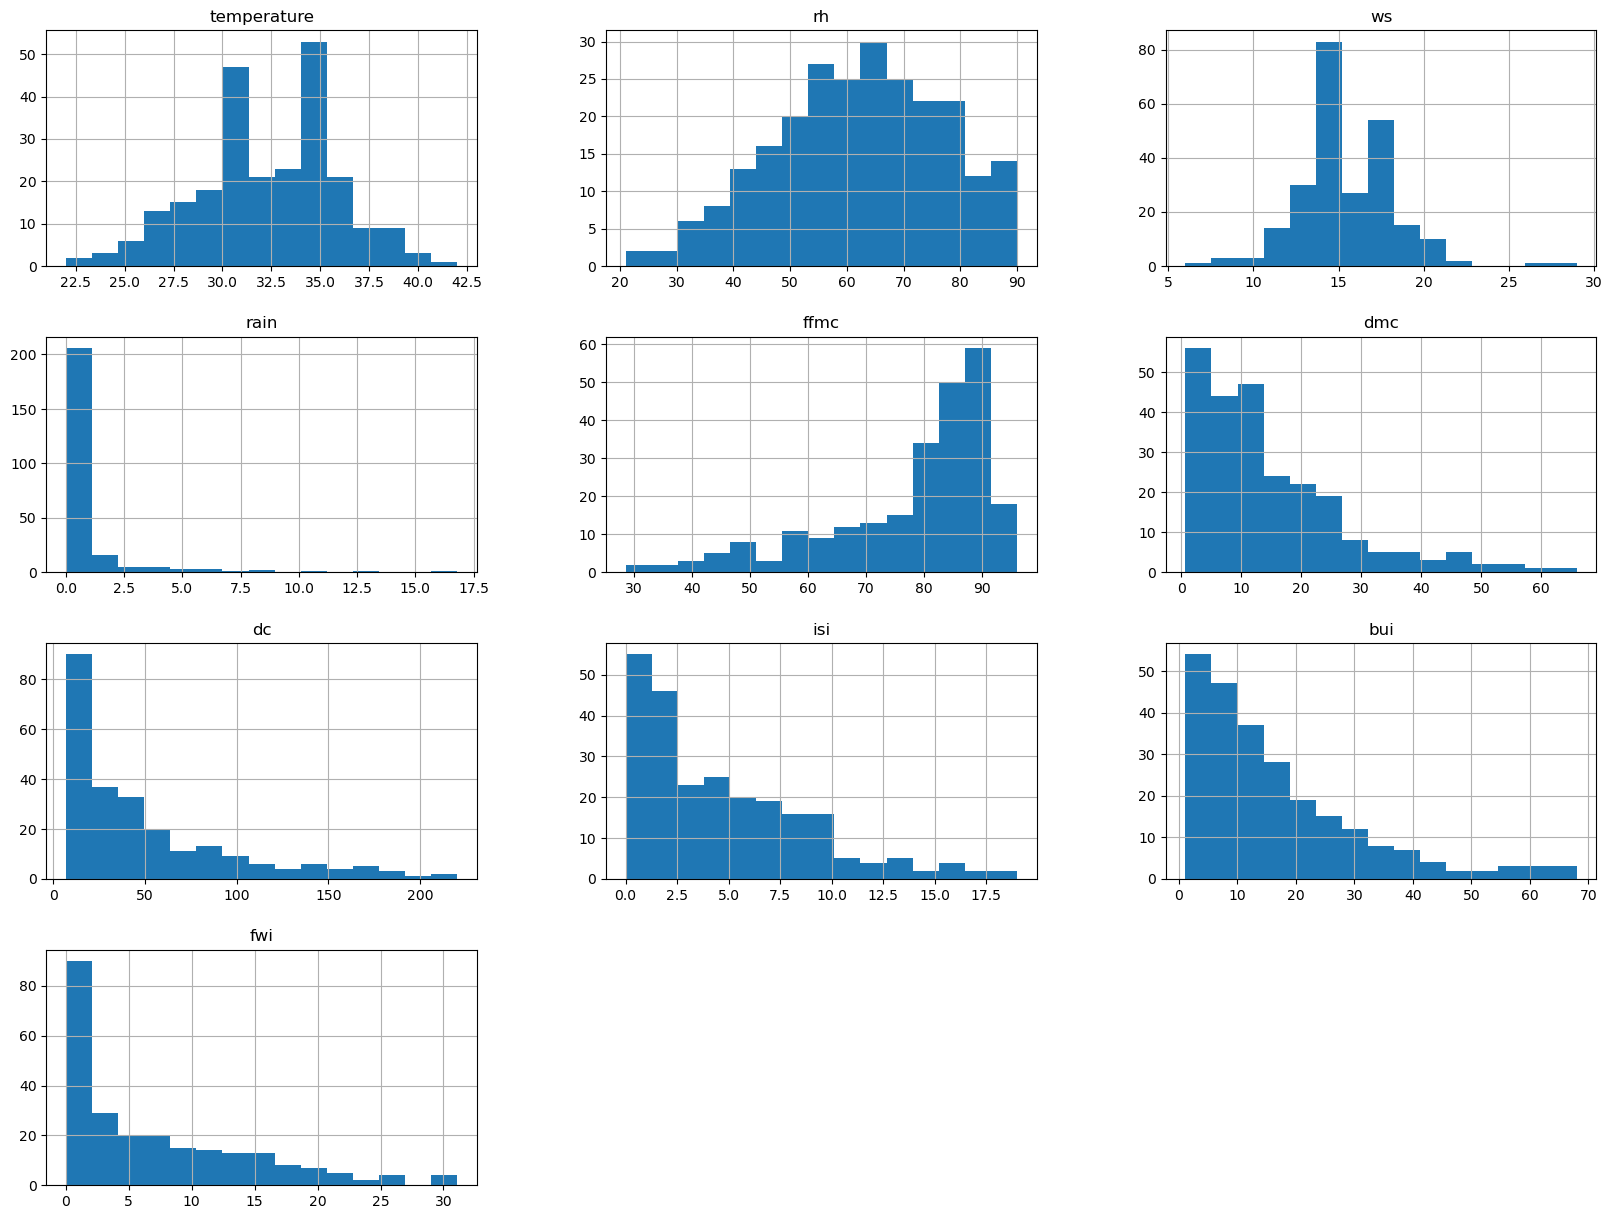

In [48]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(20,15), bins=15)
plt.show()

From dataset description:
* temperature: max noon temperature in Celsius degrees: 22 to 42
* rh : Relative Humidity in %: 21 to 90
* ws : Wind speed in km/h: 6 to 29
* rain: total day in mm: 0 to 16.8
* ffmc: Fine Fuel Moisture Code - index from the FWI system: 28.6 to 92.5
* dmc: Duff Moisture Code - index from the FWI system: 1.1 to 65.9
* dc: Drought Code - index from the FWI system: 7 to 220.4
* isi: Initial Spread Index - index from the FWI system: 0 to 18.5
* bui: Buildup Index - index from the FWI system: 1.1 to 68
* fwi: Fire Weather Index - Index: 0 to 31.1

According to graphics and dataset description:
* numeric values are in the boundaries of expected values, so there are no outliers like measurement errors
* all these features are actually numeric (no one is categorical, for example)
* most of the features have skewed distributions. It's interesting to use LOG function to normalize the values in such case

## Numeric variables by target class

Let's check are there dependencies between target class and numeric variables

### Boxplots

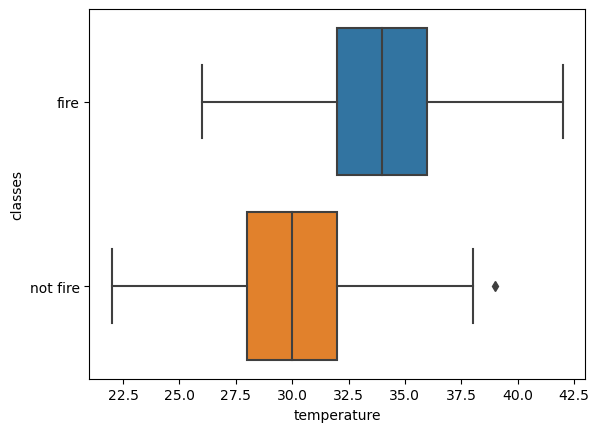

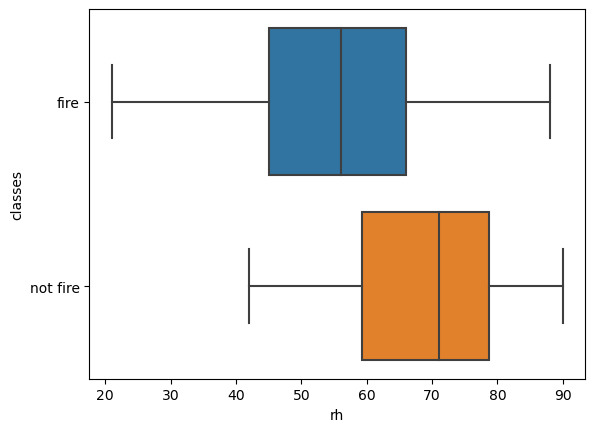

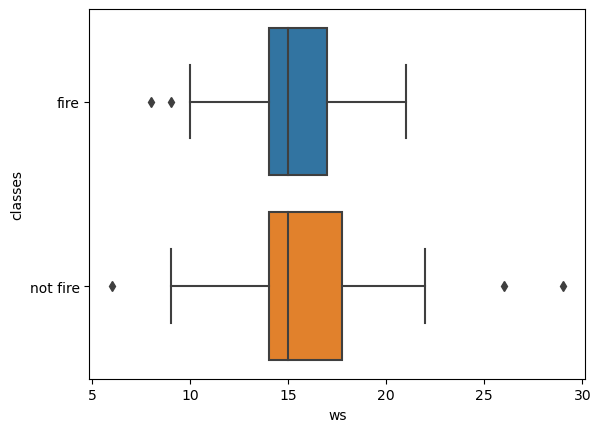

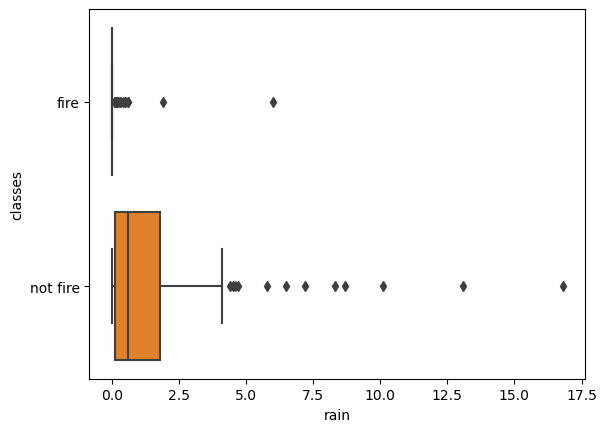

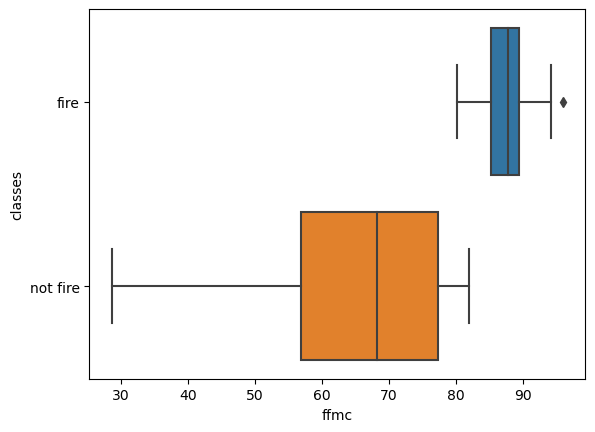

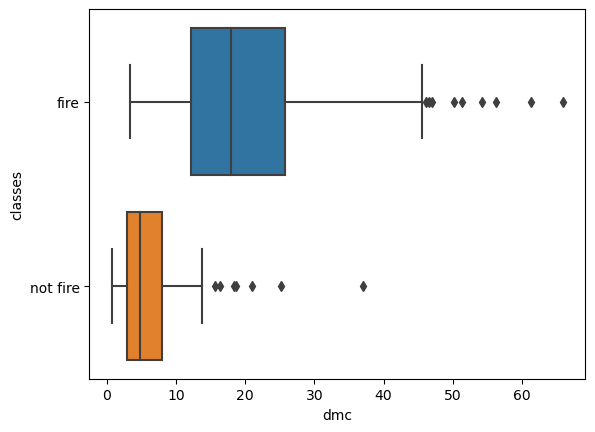

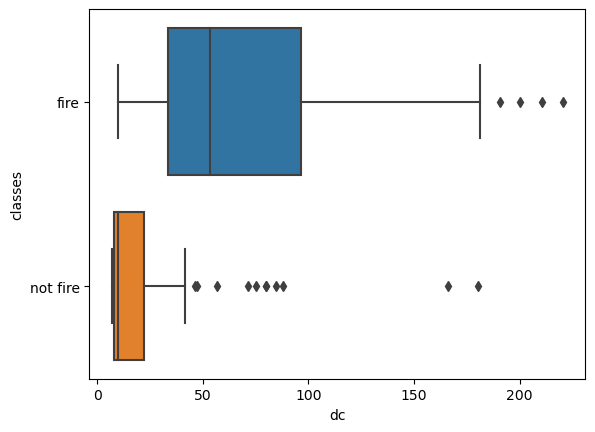

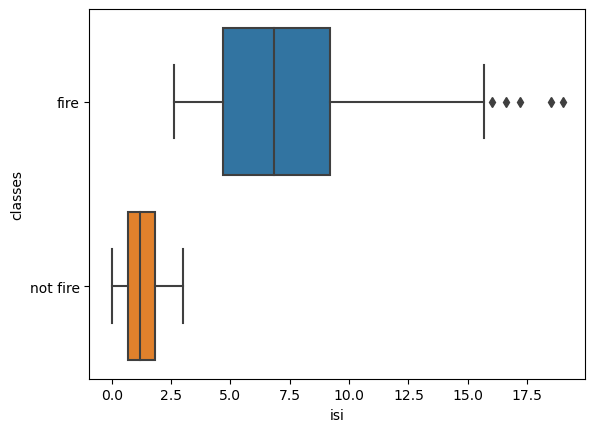

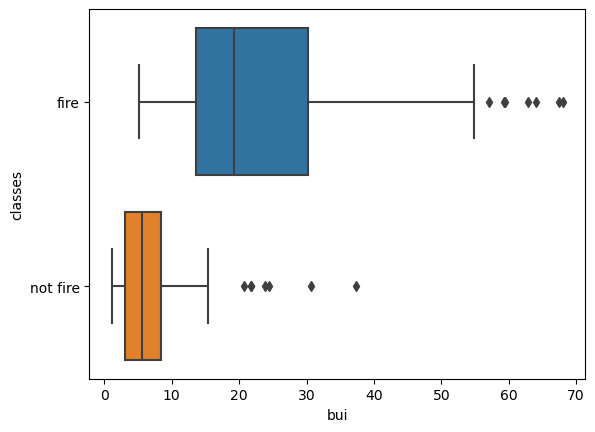

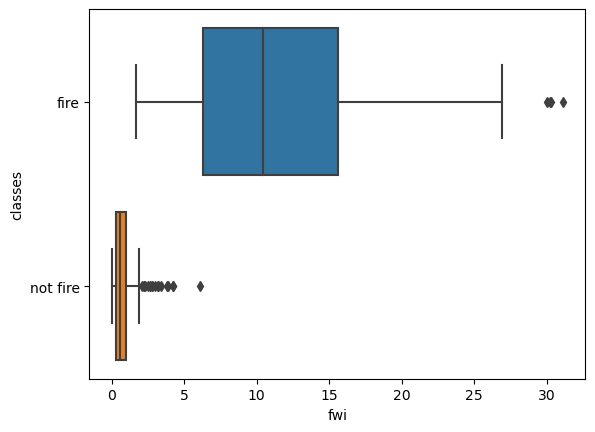

In [49]:
for num_column in df.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=num_column, y='classes', data=df, )
    plt.show()

* Most numeric values have medians of 'fire' class outside the middle 50% (IQR) of 'not fire' class and vice versa. That can be very helpful for classification models
* ws (wind speed) medians are very similar for 'fire' and 'not fire' classes. So this variable could be less helpful for good classification

# Pairplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


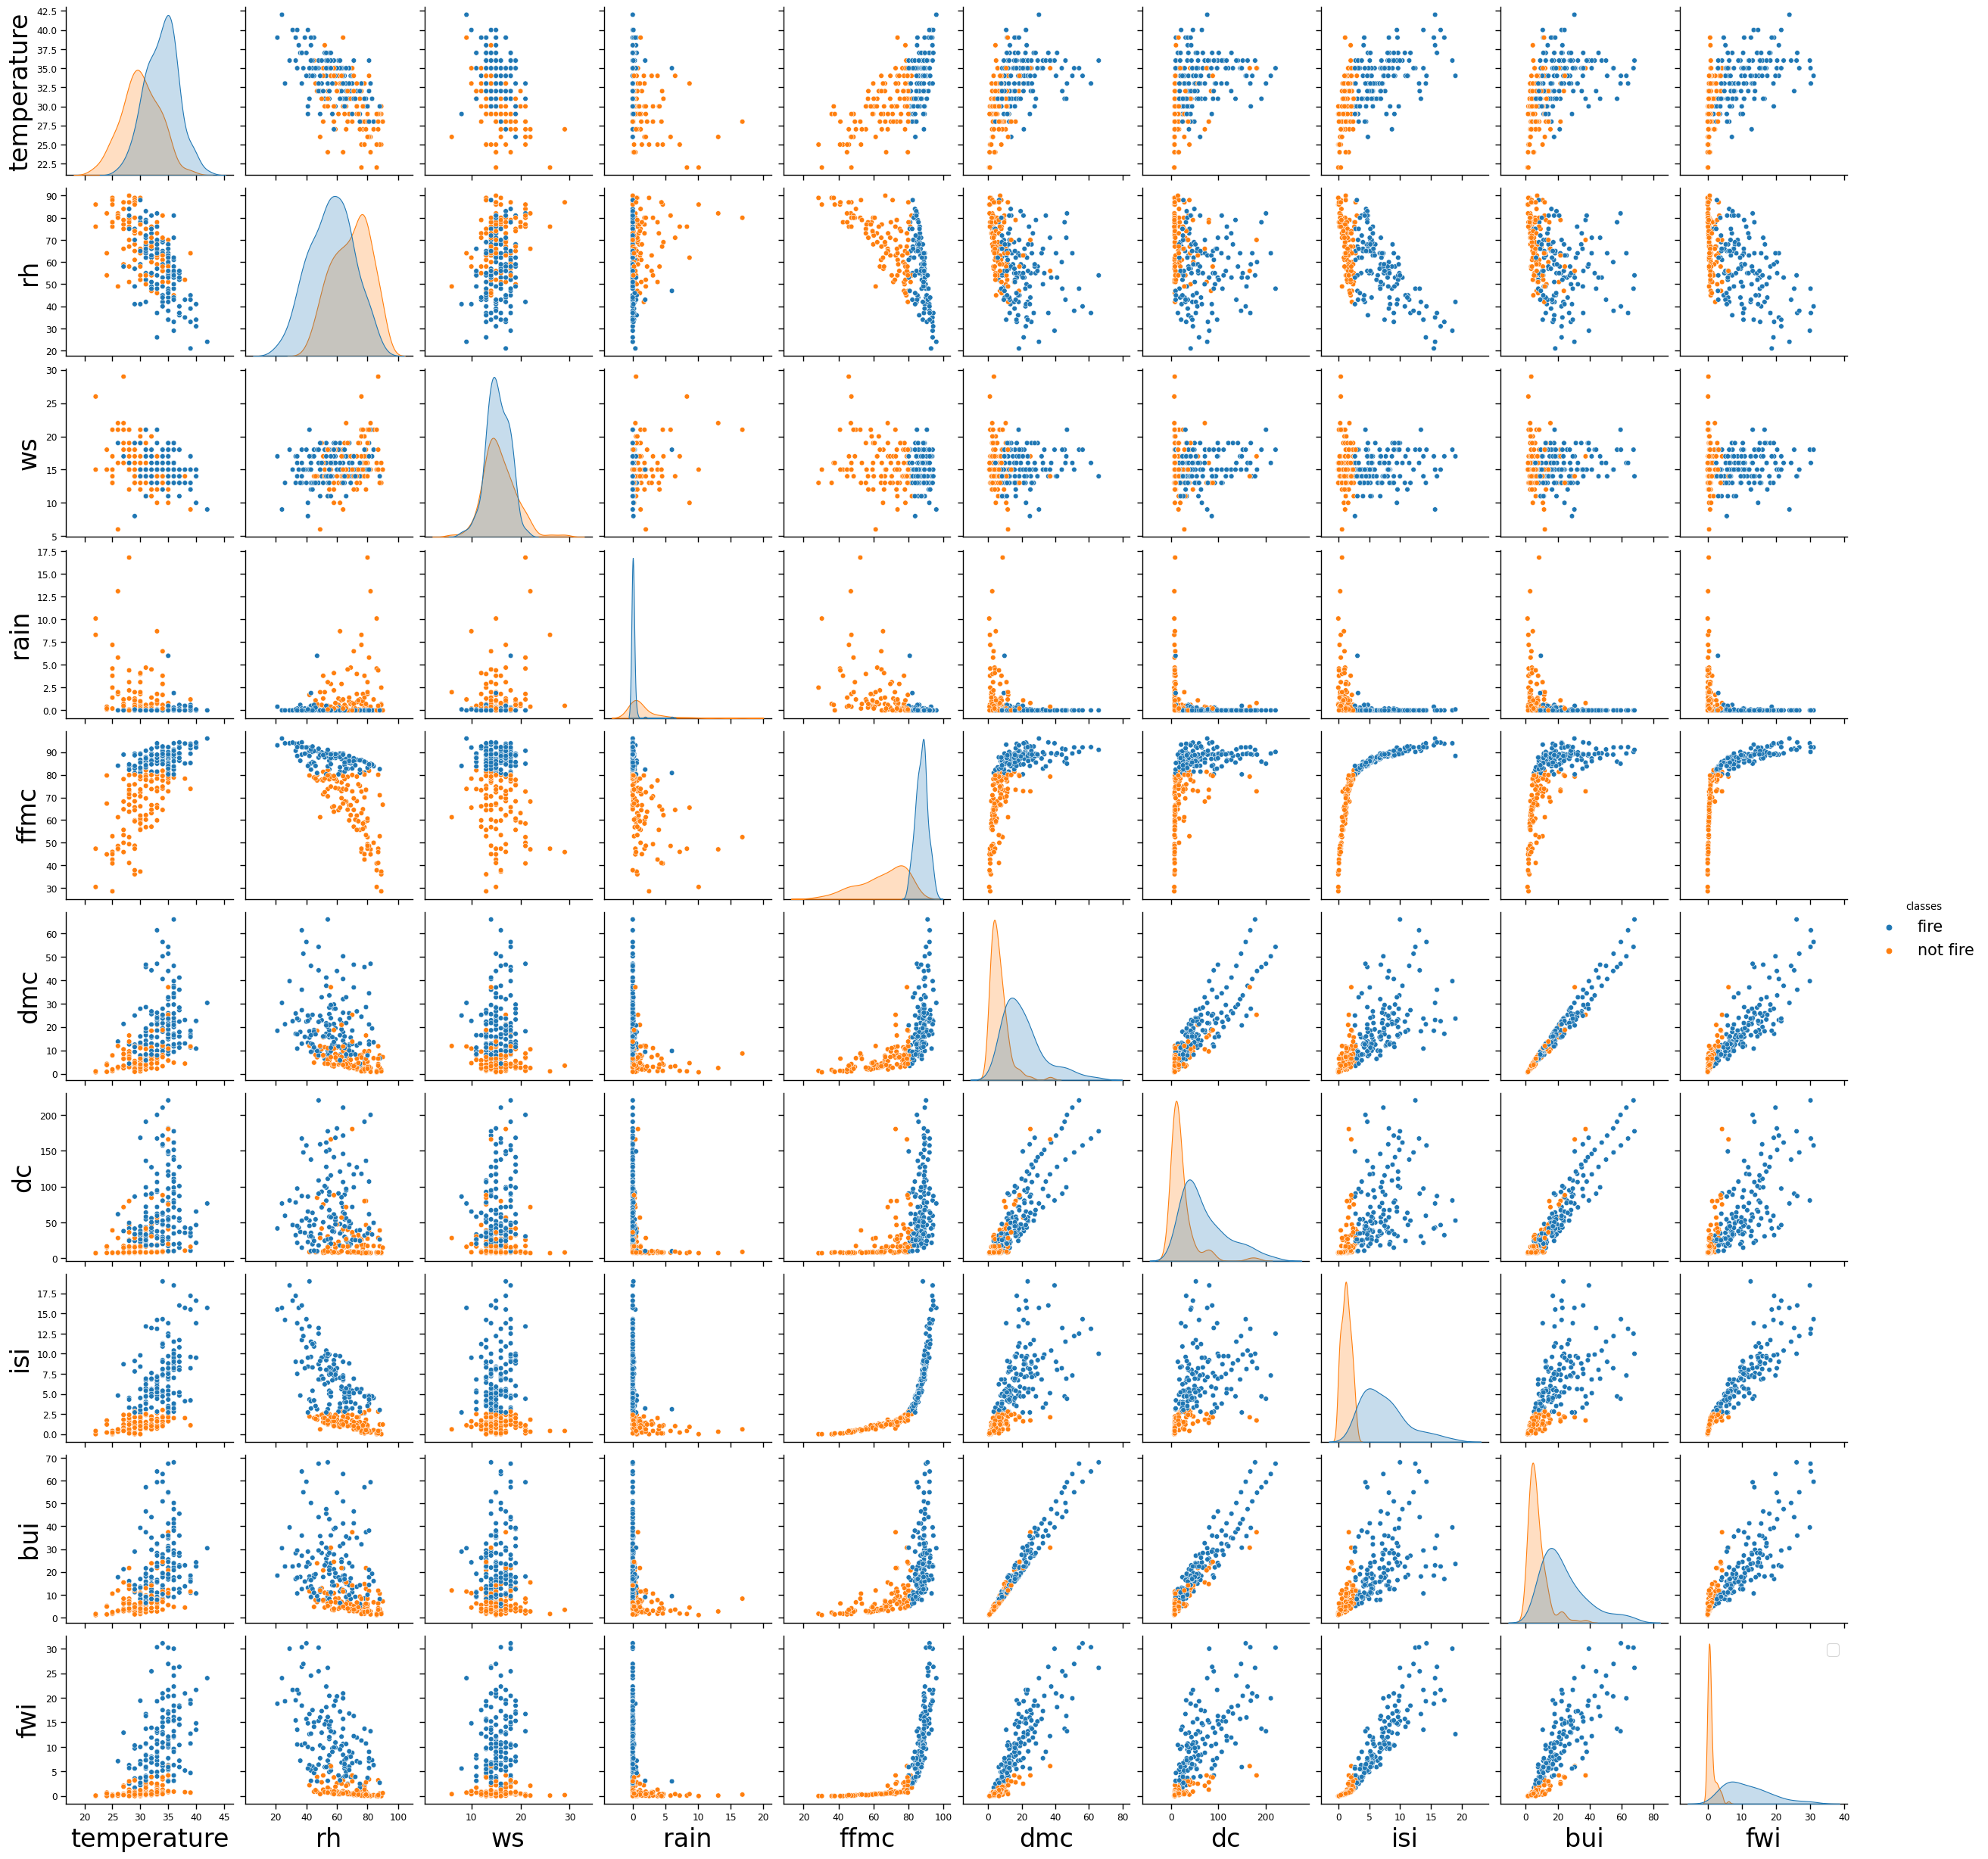

In [48]:
sns.set_context('paper', rc={'axes.labelsize':24, 'legend.fontsize': 15})
sns.pairplot(df, hue='classes')
plt.legend()
plt.show()

In [49]:
sns.set_context('paper', rc={'axes.labelsize':10})

Features that have rather strict separation between classes:
* fwi
* isi
* ffmc/ws

## Correlation between features

In [50]:
df.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi
temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
rh,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
ffmc,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
dmc,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
dc,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
isi,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
bui,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
fwi,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


In [51]:
df.corr()[df.corr() > 0.8]

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi
temperature,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rh,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ws,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rain,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ffmc,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
dmc,NaN,NaN,NaN,NaN,NaN,1.000000,0.875358,NaN,0.982206,0.875191
dc,NaN,NaN,NaN,NaN,NaN,0.875358,1.000000,NaN,0.941672,NaN
isi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.922422
bui,NaN,NaN,NaN,NaN,NaN,0.982206,0.941672,NaN,1.000000,0.856912
fwi,NaN,NaN,NaN,NaN,NaN,0.875191,NaN,0.922422,0.856912,1.000000


The most strong correlation is between:
* dmc and bui
* dc and bui
* isi and fwi
* dmc and dc
* dmc and fwi

In [52]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'date'],
      dtype='object')

In [53]:
df[['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'isi']].corr() > 0.8

,temperature,rh,ws,rain,ffmc,dmc,isi
temperature,True,False,False,False,False,False,False
rh,False,True,False,False,False,False,False
ws,False,False,True,False,False,False,False
rain,False,False,False,True,False,False,False
ffmc,False,False,False,False,True,False,False
dmc,False,False,False,False,False,True,False
isi,False,False,False,False,False,False,True


* For high correlated features pairs one feature could be remove
* Let's prepare 2 datasets. One with all features, other without high correlated feautres
* Let's see difference in model predictions and see the effect of deleting one of high correlated feautres (LATER IN NOTEBOOK)

# Target variable preprocessing

For easier usage of models' functions results let's convert target class values to 0/1 (the class of interest is fire):
* fire = 1
* not fire = 0

In [54]:
df['classes_bin'] = df['classes'].replace(['not fire', 'fire'], [0, 1])

# Train test split

* Let's divide dataset to the train and test split (2:1)
* Independent variables (features) would be 10 numeric variables

In [55]:
X = df.select_dtypes(include=['int64', 'float64'])
y = df['classes_bin']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
X.shape, y.shape

((244, 10), (244,))

In [58]:
X_train.shape, y_train.shape

((163, 10), (163,))

In [59]:
X_test.shape, y_test.shape

((81, 10), (81,))

# Analyze Feature Transformations that can be used

## X_train features before transformation

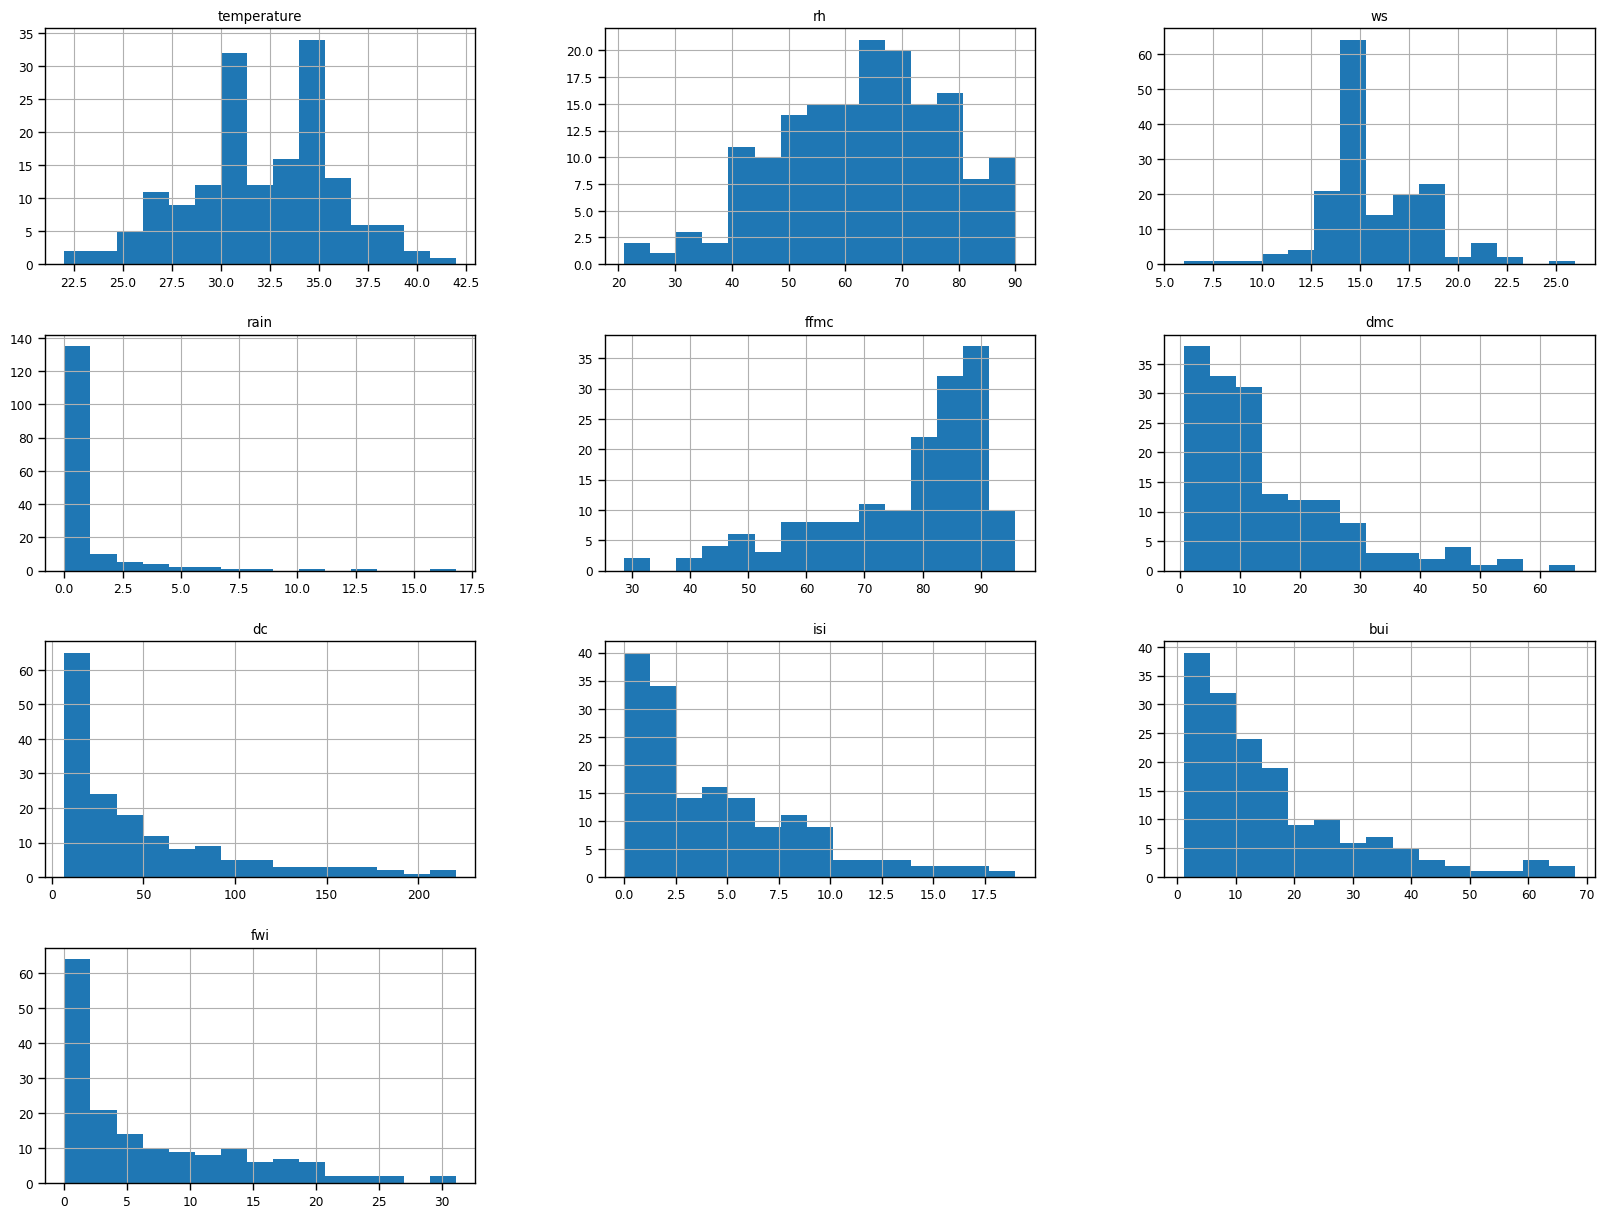

In [60]:
X_train.select_dtypes(include=['int64', 'float64']).hist(figsize=(20,15), bins=15)
plt.show()

## StandardScaler

* StandardScaler() is used for data Standartization
* Output values have mean = 0, std = 1

In [61]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc[:5]

array([[ 0.00487747, -0.60257784, -1.68484146, -0.17054229, -0.21111893,
        -0.52803826, -0.37632548, -0.80014076, -0.47763563, -0.8196431 ],
       [ 0.53489642,  0.14460201, -0.93856657, -0.39436188,  0.68368506,
        -0.27533182, -0.3905248 ,  0.16132584, -0.3471914 , -0.08219052],
       [-0.260132  , -1.41768313,  2.04653297, -0.39436188,  0.94324652,
         0.28536062, -0.374297  ,  2.13233237,  0.09906517,  1.36540157],
       [ 0.53489642, -1.55353401,  0.92712064, -0.39436188,  1.04570499,
         3.29414677,  2.20186494,  2.34866235,  2.94824172,  3.33194176],
       [ 0.53489642, -0.46672696, -0.19229169,  0.90379174, -0.13598272,
        -0.59121488, -0.80027654, -0.7039941 , -0.66986923, -0.80598657]])

In [62]:
X_train.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi
114,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1
132,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7
207,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1
162,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8


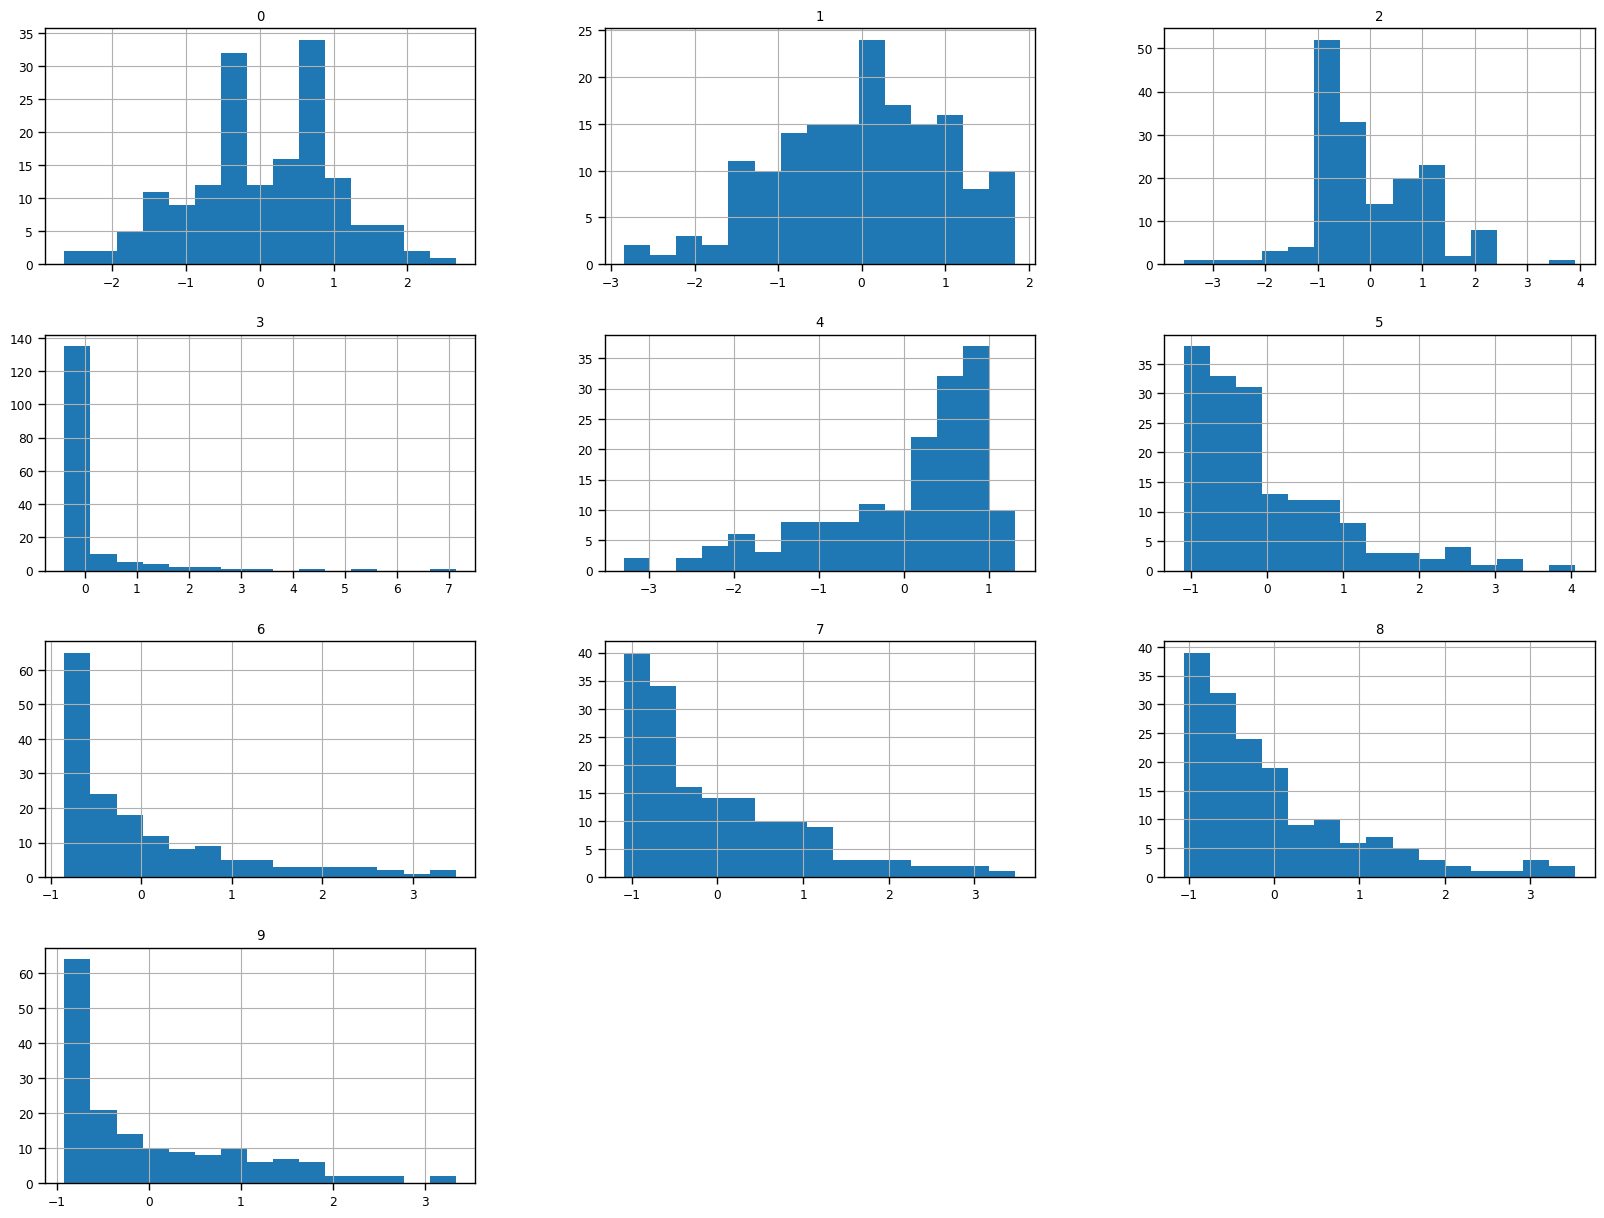

In [63]:
pd.DataFrame(X_train_sc).hist(figsize=(20,15), bins=15)
plt.show()

## RobustScaler

* Robust Scaler use statistics that are robust to outliers

In [64]:
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_train_rs[:5]

array([[ 0.00000000e+00, -4.65116279e-01, -1.33333333e+00,
         8.33333333e-01, -4.24083770e-01, -2.03278689e-01,
        -1.63132137e-03, -3.10344828e-01, -1.13772455e-01,
        -2.94930876e-01],
       [ 3.63636364e-01,  4.65116279e-02, -6.66666667e-01,
         0.00000000e+00,  2.61780105e-01,  6.55737705e-03,
        -1.30505710e-02,  3.79310345e-01,  0.00000000e+00,
         2.02764977e-01],
       [-1.81818182e-01, -1.02325581e+00,  2.00000000e+00,
         0.00000000e+00,  4.60732984e-01,  4.72131148e-01,
         0.00000000e+00,  1.79310345e+00,  3.89221557e-01,
         1.17972350e+00],
       [ 3.63636364e-01, -1.11627907e+00,  1.00000000e+00,
         0.00000000e+00,  5.39267016e-01,  2.97049180e+00,
         2.07177814e+00,  1.94827586e+00,  2.87425150e+00,
         2.50691244e+00],
       [ 3.63636364e-01, -3.72093023e-01,  0.00000000e+00,
         4.83333333e+00, -3.66492147e-01, -2.55737705e-01,
        -3.42577488e-01, -2.41379310e-01, -2.81437126e-01,
        -2.

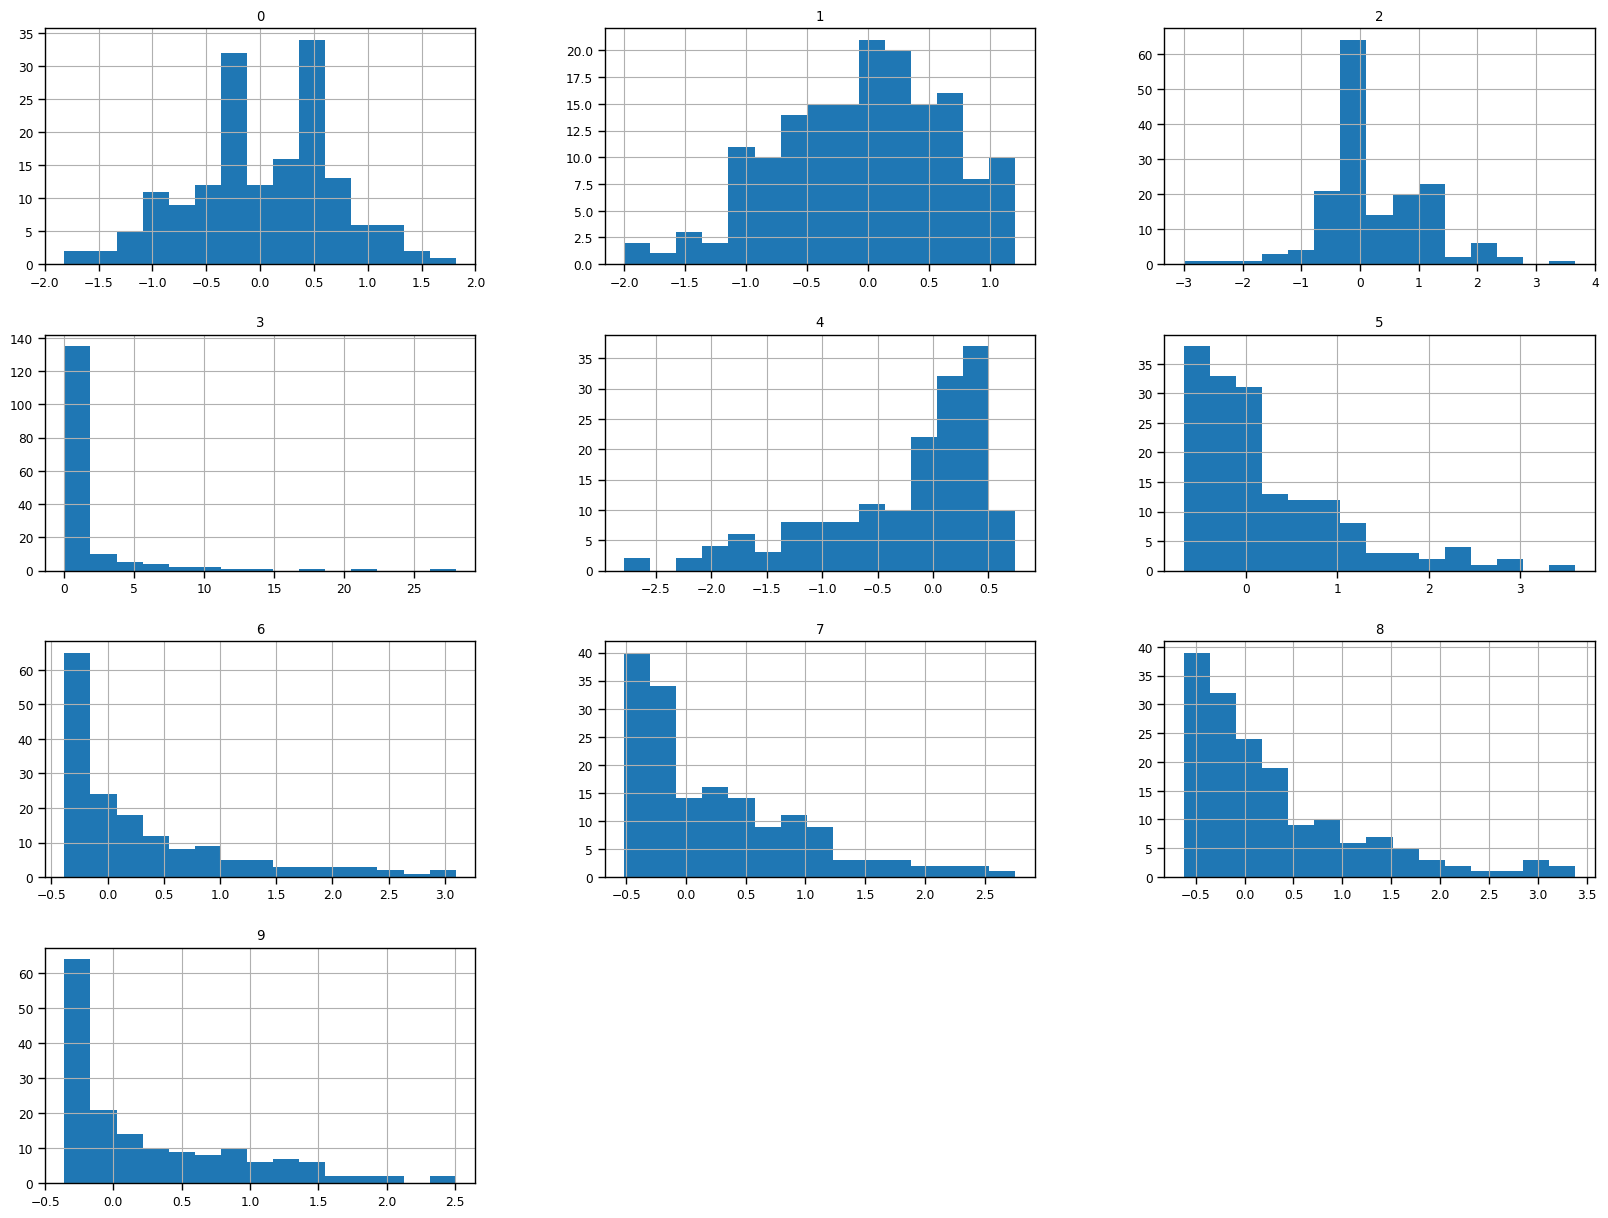

In [65]:
pd.DataFrame(X_train_rs).hist(figsize=(20,15), bins=15)
plt.show()

* After the Robust Scaler feature distributions have smaller tails (for very skewed distributions)

## MinMaxScaler

* MinMixScaler() used for normalization
* Output values are between 0 and 1

In [66]:
sc_minmax = MinMaxScaler()

In [67]:
X_train_mm = sc_minmax.fit_transform(X_train)
X_test_mm = sc_minmax.transform(X_test)

In [68]:
X_train_mm[:5]

array([[0.5       , 0.47826087, 0.25      , 0.0297619 , 0.66913947,
        0.11042945, 0.11007026, 0.06315789, 0.12705531, 0.02250804],
       [0.6       , 0.63768116, 0.35      , 0.        , 0.86350148,
        0.1595092 , 0.10679157, 0.27368421, 0.1554559 , 0.19614148],
       [0.45      , 0.30434783, 0.75      , 0.        , 0.91988131,
        0.26840491, 0.11053864, 0.70526316, 0.25261584, 0.53697749],
       [0.6       , 0.27536232, 0.6       , 0.        , 0.9421365 ,
        0.85276074, 0.70538642, 0.75263158, 0.87294469, 1.        ],
       [0.6       , 0.50724638, 0.45      , 0.17261905, 0.68545994,
        0.09815951, 0.01217799, 0.08421053, 0.08520179, 0.02572347]])

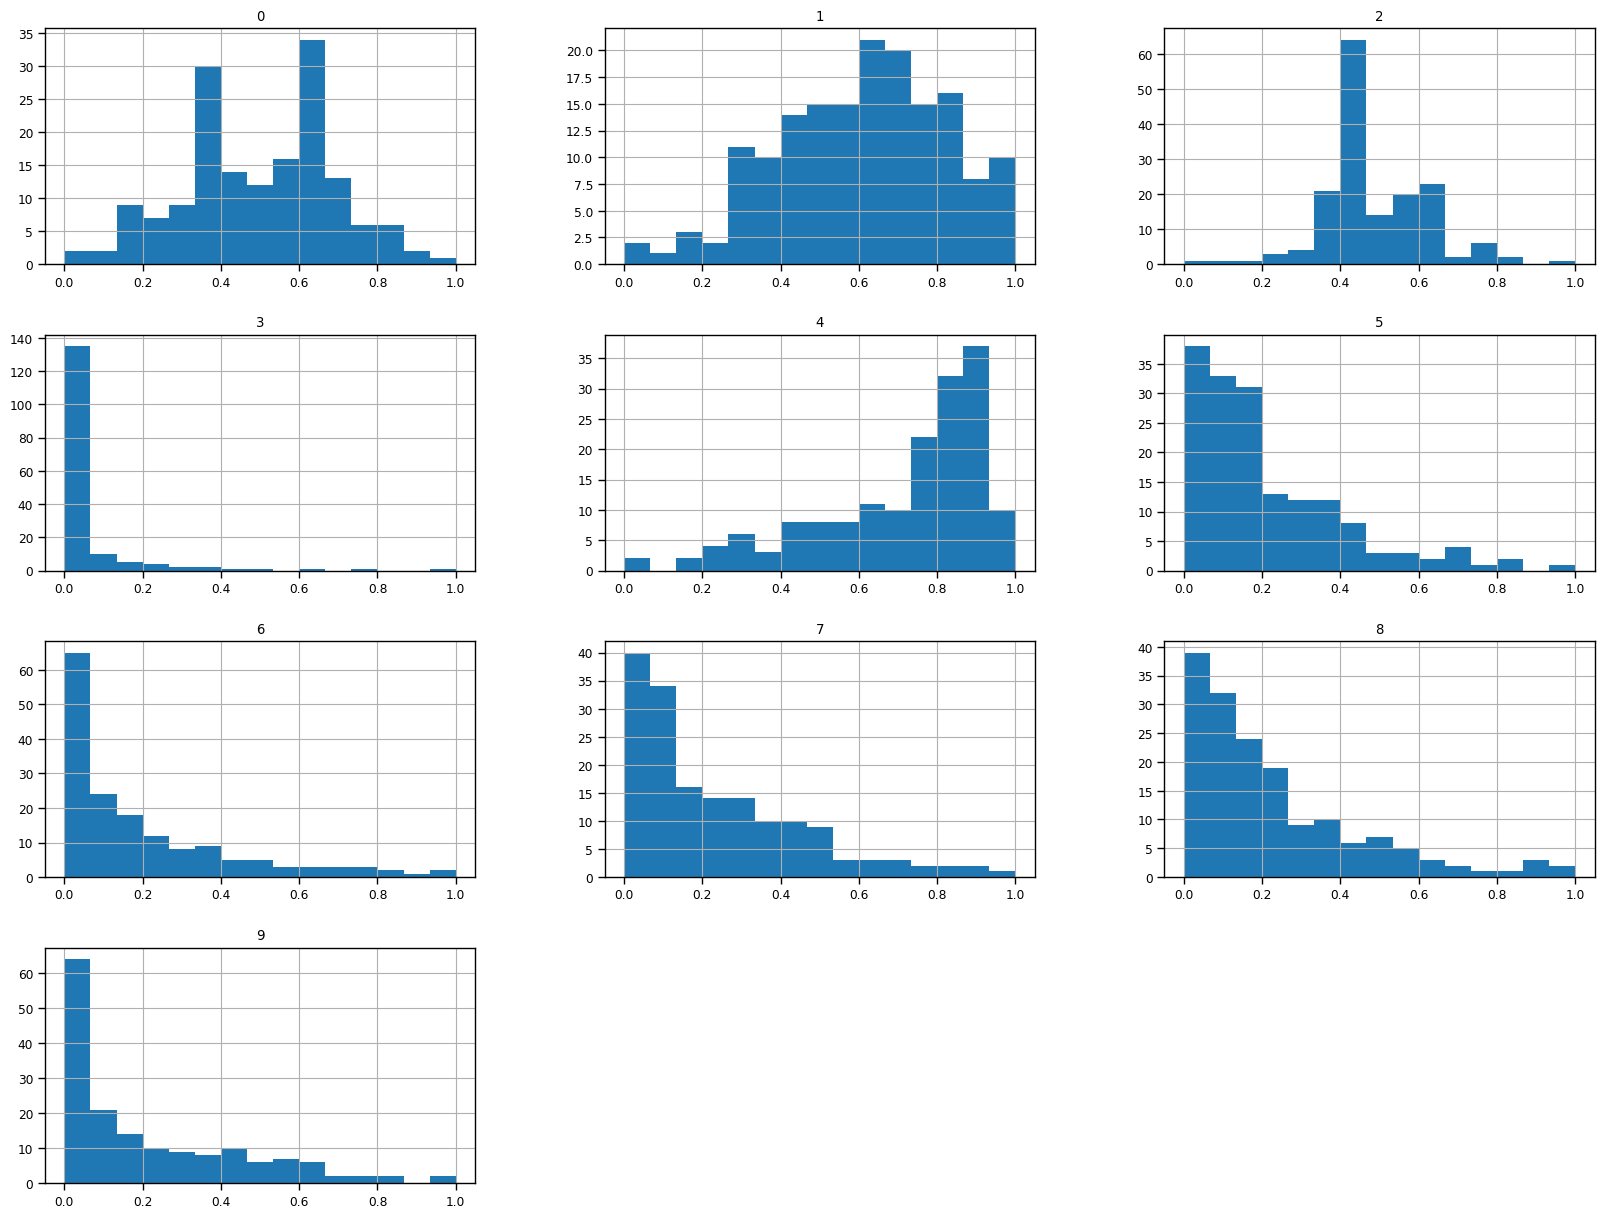

In [69]:
pd.DataFrame(X_train_mm).hist(figsize=(20,15), bins=15)
plt.show()

## Log features

In [70]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

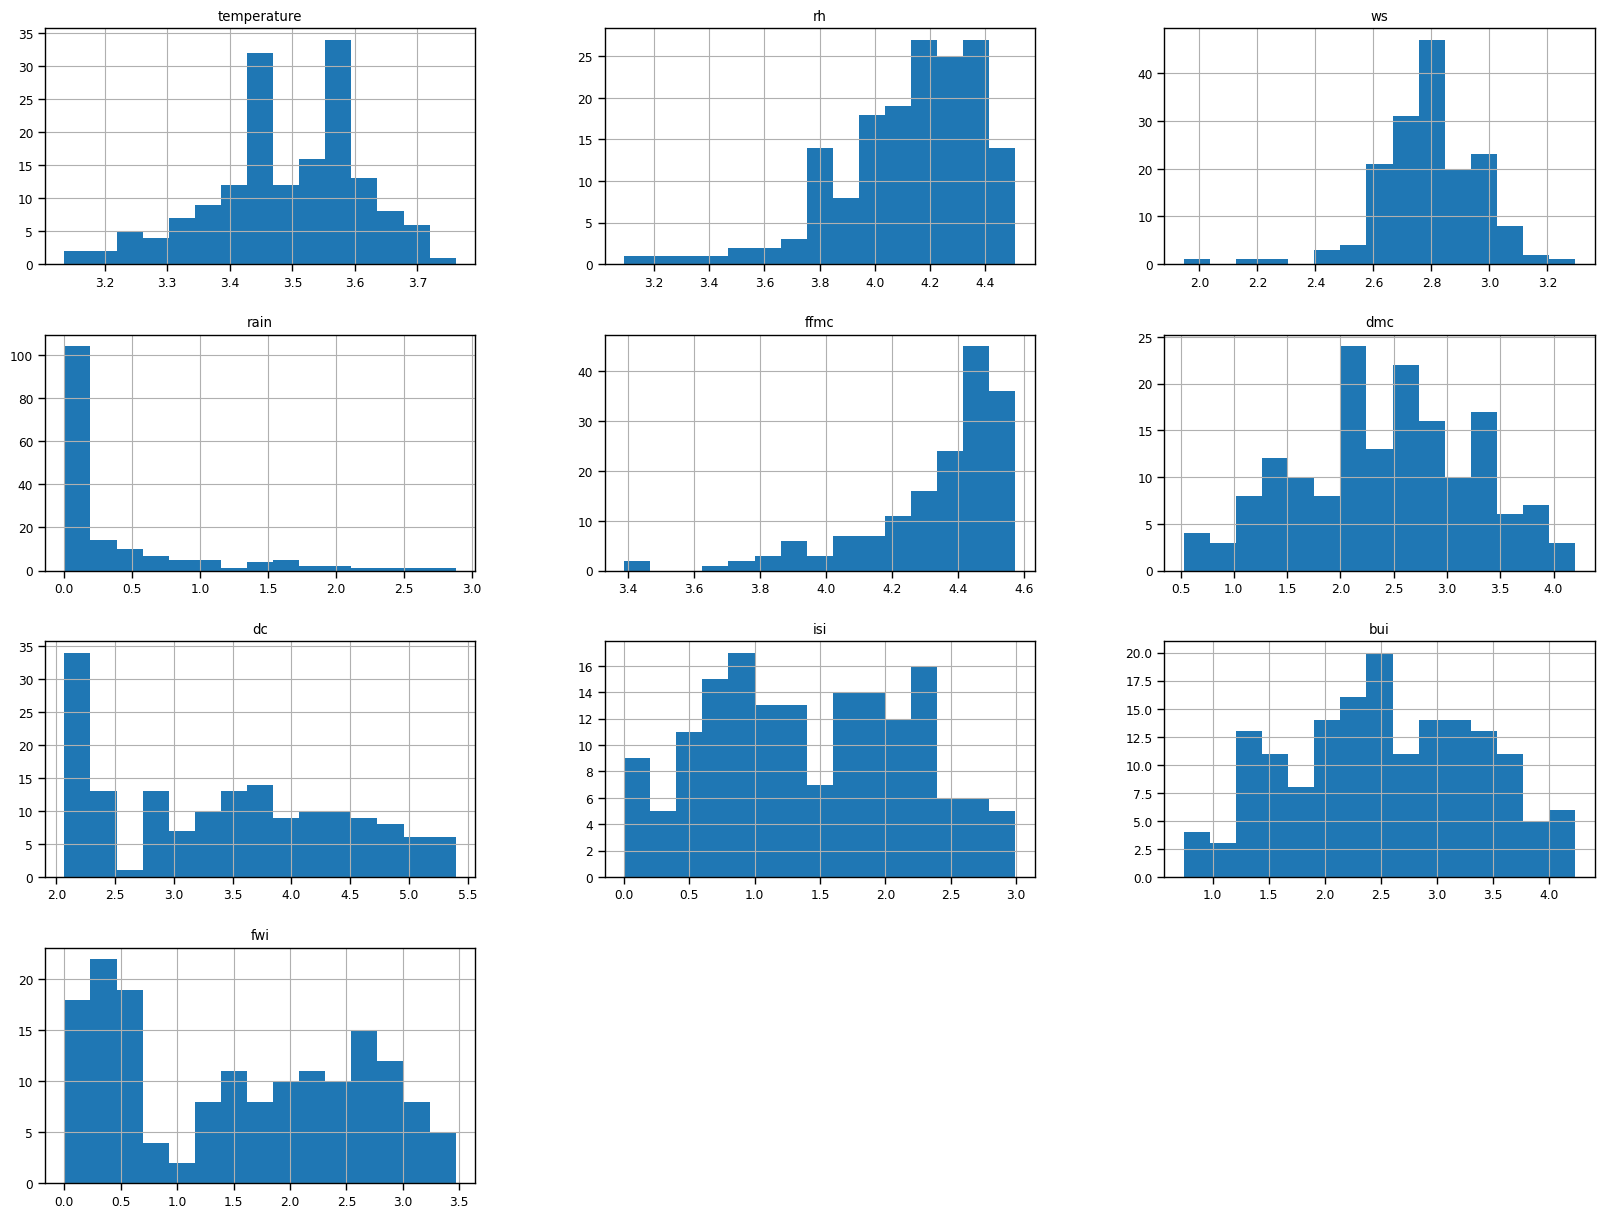

In [71]:
pd.DataFrame(X_train_log).hist(figsize=(20,15), bins=15)
plt.show()

* Right-skewed distributions became more normal

# Building Classification Models

## Classification Metrics

In [64]:
def show_classifier_metrics(y_test, y_pred, y_pred_proba):
    print(f'SCORES:\n')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))
    print(f'ROC AUC: {metrics.roc_auc_score(y_test, y_pred)}')
    print()
    print(f'Log Loss: {metrics.log_loss(y_test, y_pred_proba)}\n')

## Classification Pipeline for Models Tuning

In [73]:
def run_classifier_pipelines_with_plot(clf_name, clf, clfs_parameters, X_train, y_train, X_test, y_test):
    classification_pipelines = [
        Pipeline(
            [
                (clf_name, clf)
            ]
        ),
        Pipeline(
            [
                ('standard_scaler', StandardScaler()),
                (clf_name, clf)
            ]
        ),
        Pipeline(
            [
                ('robust_scaler', RobustScaler()),
                (clf_name, clf)
            ]
        ),
        Pipeline(
            [
                ('minmax', MinMaxScaler()),
                (clf_name, clf)
            ]
        ),
        Pipeline(
            [
                ('log', FunctionTransformer(np.log1p)), # not np.log() because there are 0 values
                (clf_name, clf)
            ]
        )
    ]
    
    titles = ['without_feature_transform', 'standard_scaler', 'robust_scaler', 'min_max_scaler', 'log_transform']
    
    for title, clf in zip(titles, classification_pipelines):
        print(f'\n===== {clf_name} {title} =====\n')

        grid = GridSearchCV(clf, clfs_parameters, cv=5)
        grid.fit(X_train, y_train)
        print(f'best estimator: {grid.best_estimator_}\n')

        clf = grid.best_estimator_
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)

        show_classifier_metrics(y_test, y_pred, y_pred_proba)
        
        # ROC Curve plot
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
        label = clf_name + ' ' + title
        plt.plot(fpr, tpr, marker='.', label=label)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.figure(figsize=(20,10))
    plt.show()

## KNN - K Nearest Neighbors

Hyper parameters for tuning:
* n_neighbors - number of neighbors to use (default=3)
* weights - weight function used in prediction ('uniform', 'distance')
* algorithm - algorithm used to compute neares neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
* leaf_size - leaf size of BallTree or KDTree (default=30)
* metric - metric to use for distance computation (default='minkowski' - we use it)
* p - power parameter for minkowski distance (default=2 - equivalent to euclidean distance; 1 - equivalent to manhattan distance)

In [74]:
knn_parameters = {'knn__n_neighbors': [3,5,7,9,12],
                  'knn__weights': ['uniform', 'distance'],
                  'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'knn__leaf_size': [10, 20, 30, 40, 50],
                  'knn__p': [1,2]}


===== knn without_feature_transform =====

best estimator: Pipeline(steps=[('knn',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.92      0.96        53

    accuracy                           0.95        81
   macro avg       0.94      0.96      0.95        81
weighted avg       0.96      0.95      0.95        81

ROC AUC: 0.9622641509433962

Log Loss: 0.11932710567998323


===== knn standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=10, p=1, weights='distance'))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.92      0.96        53

    accuracy   

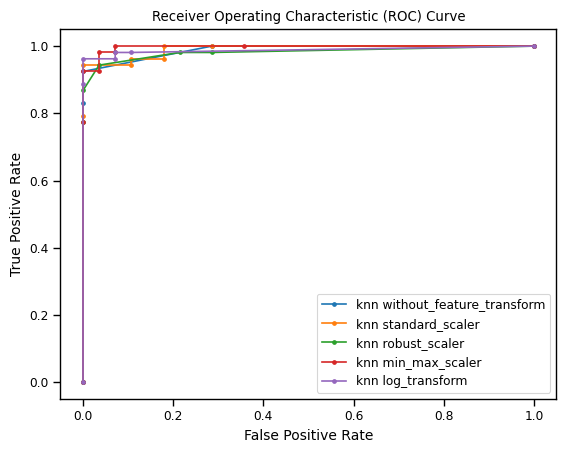

<Figure size 2000x1000 with 0 Axes>

Wall time: 37.1 s


In [75]:
%%time
run_classifier_pipelines_with_plot('knn', KNeighborsClassifier(),
                                   knn_parameters,
                                   X_train, y_train, X_test, y_test)

## Logistic Regression

Hyper parameters for tuning:
* penalty - norm of the penalty (None, 'l1', 'l2', 'elasticnet')
* C - inverse of regularization strength. smaller values specify stronger regularization
* solver - algorithm to use in the optimization problem ('lbfgs', 'liblinear'). For small datasets, ‘liblinear’ is a good choice

In [76]:
logreg_parameters = {'logreg__random_state': [42],
                     'logreg__penalty': [None, 'l1', 'l2', 'elasticnet'],
                     'logreg__C': [100, 10, 1, 0.1, 0.01],
                     'logreg__solver': ['lbfgs', 'liblinear']}


===== logreg without_feature_transform =====

best estimator: Pipeline(steps=[('logreg',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        53

    accuracy                           0.98        81
   macro avg       0.97      0.98      0.97        81
weighted avg       0.98      0.98      0.98        81

ROC AUC: 0.9811320754716981

Log Loss: 0.05213313452048999


===== logreg standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

     

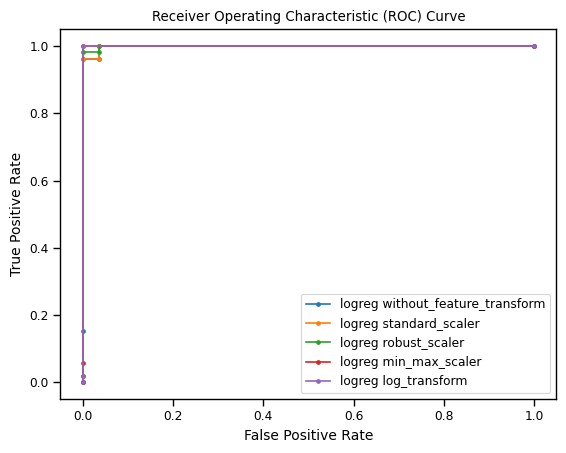

<Figure size 2000x1000 with 0 Axes>

Wall time: 3.56 s


In [77]:
%%time
run_classifier_pipelines_with_plot('logreg', LogisticRegression(),
                                   logreg_parameters,
                                   X_train, y_train, X_test, y_test)

## Decision Tree

Hyper parameters for tuning:
* criterion - the function to measure the quality of a split (default='gini', 'entropy', 'log_loss')
* splitter - the strategy used to choose the split at each node (default='best', 'random')
* max_depth - the maximum depth of the tree (default=None)
* min_samples_split - the minimum number of samples required to split an internal node (default=None)
* min_samples_leaf - the minimum number of samples required to be at a leaf node (default=1)
* max_features - the number of features to consider when looking for the best split ('sqrt', 'log2')

In [78]:
dtree_parameters = {'dtree__random_state': [42],
                    'dtree__criterion': ['gini', 'entropy', 'log_loss'],
                    'dtree__splitter': ['best', 'random'],
                    'dtree__max_depth': [2, 3, 5, 10, 50],
                    'dtree__min_samples_split': [2,3,10,30,50,100],
                    'dtree__min_samples_leaf': [1,5,8,10],
                    'dtree__max_features': ['sqrt', 'log2']}


===== dtree without_feature_transform =====

best estimator: Pipeline(steps=[('dtree',
                 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                                        random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        53

    accuracy                           0.99        81
   macro avg       0.99      0.98      0.99        81
weighted avg       0.99      0.99      0.99        81

ROC AUC: 0.9821428571428572

Log Loss: 0.031186978076463576


===== dtree standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('dtree',
                 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                                        random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

  

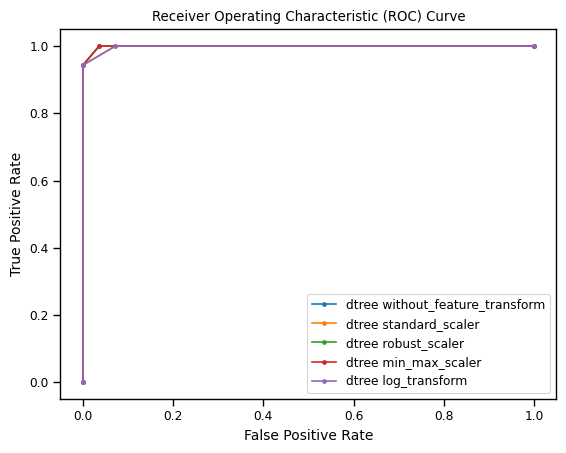

<Figure size 2000x1000 with 0 Axes>

Wall time: 1min 43s


In [79]:
%%time
run_classifier_pipelines_with_plot('dtree', DecisionTreeClassifier(),
                                   dtree_parameters,
                                   X_train, y_train, X_test, y_test)

## SVM Classifier

Hyper parameters for tuning:
* C - regularization parameter, the strength of the regularization is inversely proportional to C. The penalty is a squared l2 penalty
* kernel - Specifies the kernel type to be used in the algorithm ('linear', 'rbf')
* gamma - kernel coefficient for ‘rbf’

In [80]:
svc_parameters = [
    {'svc__random_state': [42], 'svc__C': [0.01, 0.1, 1, 10, 100, 1000], 'svc__kernel': ['linear']},
    {'svc__random_state': [42], 'svc__C': [0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [0.001, 0.0001], 'svc__kernel': ['rbf']}
]


===== svc without_feature_transform =====

best estimator: Pipeline(steps=[('svc',
                 SVC(C=100, gamma=0.0001, probability=True, random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.96      0.96      0.96        53

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

ROC AUC: 0.9454177897574124

Log Loss: 0.11955539117770968


===== svc standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc',
                 SVC(C=100, kernel='linear', probability=True,
                     random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.

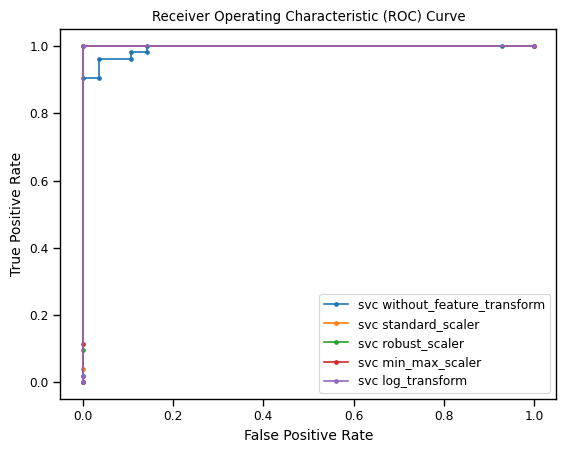

<Figure size 2000x1000 with 0 Axes>

Wall time: 2.63 s


In [81]:
%%time
run_classifier_pipelines_with_plot('svc', svm.SVC(probability=True),
                                   svc_parameters,
                                   X_train, y_train, X_test, y_test)

## Random Forest

Hyper parameters for tuning:
* n_estimators - the number of trees in the forest
* criterion - the function to measure the quality of a split (default='gini', 'entropy', 'log_loss')
* max_depth - the maximum depth of the tree (default=None)
* min_samples_split - the minimum number of samples required to split an internal node (default=None)
* min_samples_leaf - the minimum number of samples required to be at a leaf node (default=1)
* max_features - the number of features to consider when looking for the best split ('sqrt', 'log2')
* bootstrap - whether bootstrap samples are used when building trees (if False, the whole dataset is used to build each tree)

In [82]:
rf_parameters = {'rf__random_state': [42],
                 'rf__n_estimators': [5, 9, 12, 20, 100],
                 'rf__criterion': ['gini', 'entropy', 'log_loss'],
                 'rf__max_depth': [2, 3, 5, 10],
                 'rf__min_samples_split': [2,3,10,30,100],
                 'rf__min_samples_leaf': [1,5,8,10],
                 'rf__max_features': ['sqrt', 'log2'],
                 'rf__bootstrap': [True, False]}


===== rf without_feature_transform =====

best estimator: Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=3, max_features='sqrt',
                                        min_samples_leaf=5, n_estimators=20,
                                        random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        53

    accuracy                           0.96        81
   macro avg       0.95      0.97      0.96        81
weighted avg       0.97      0.96      0.96        81

ROC AUC: 0.9716981132075472

Log Loss: 0.07935223933015456


===== rf standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=3, max_features='sqrt',
                                        min_samples_leaf=5, n_estimators=20,
         

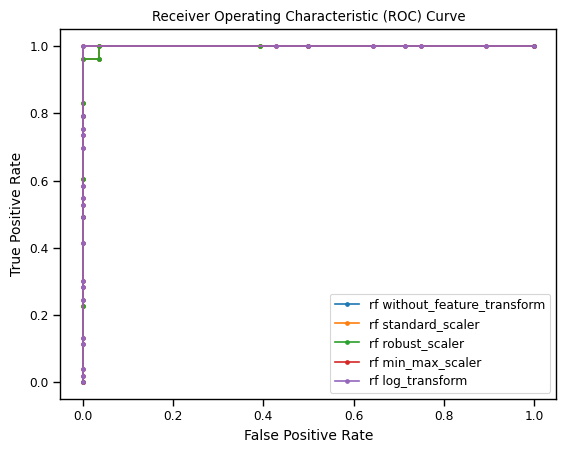

<Figure size 2000x1000 with 0 Axes>

Wall time: 35min 5s


In [83]:
%%time
run_classifier_pipelines_with_plot('rf', RandomForestClassifier(),
                                   rf_parameters,
                                   X_train, y_train, X_test, y_test)

# Comparison between models' metrics

* Cross validation hyperparameter tuning helps to find parameters with very high metrics
* If no transformations to data applied Decision Tree has the best accuracy on test data
* For KNN, Logistic Regression algorithms the best metrics are for features log transformation (more normal distributions)
* For SVM Classifier feature transformations give a good metrics improvement
* Random Forest results are best if we use normalization (MinMaxScaler) or log transformation

The dataset is small and even simple models (with tuned hyperparameters) very high metrics

# Dataset with less features (correlated deleted)

## Train test split and Target variable preprocessing

In [84]:
df_corr_fix = df[['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'isi', 'classes']].copy()
df_corr_fix['classes_bin'] = df_corr_fix['classes'].replace(['not fire', 'fire'], [0, 1])

In [85]:
X_corr_fix = df_corr_fix.select_dtypes(include=['int64', 'float64'])
y_corr_fix = df_corr_fix['classes_bin']

In [86]:
X_train_corr_fix, X_test_corr_fix, \
  y_train_corr_fix, y_test_corr_fix = train_test_split(X_corr_fix, y_corr_fix,
                                                       test_size=0.33, random_state=42)

In [87]:
X_corr_fix.shape, y_corr_fix.shape

((244, 7), (244,))

In [88]:
X_train_corr_fix.shape, y_train_corr_fix.shape

((163, 7), (163,))

In [89]:
X_test_corr_fix.shape, y_test_corr_fix.shape

((81, 7), (81,))

## KNN - K Nearest Neighbors (High correlated features deleted)


===== knn without_feature_transform =====

best estimator: Pipeline(steps=[('knn',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=12, p=1,
                                      weights='distance'))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        53

    accuracy                           0.96        81
   macro avg       0.95      0.97      0.96        81
weighted avg       0.97      0.96      0.96        81

ROC AUC: 0.9716981132075472

Log Loss: 0.12738299441753015


===== knn standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=12, p=1,
                                      weights='distance'))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           

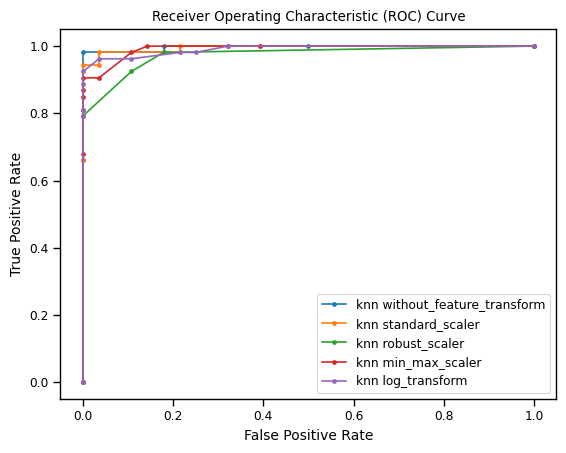

<Figure size 2000x1000 with 0 Axes>

Wall time: 36.1 s


In [90]:
%%time
run_classifier_pipelines_with_plot('knn', KNeighborsClassifier(),
                                   knn_parameters,
                                   X_train_corr_fix, y_train_corr_fix,
                                   X_test_corr_fix, y_test_corr_fix)

## Logistic Regression (High correlated features deleted)


===== logreg without_feature_transform =====

best estimator: Pipeline(steps=[('logreg',
                 LogisticRegression(C=1, random_state=42, solver='liblinear'))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.98      0.94      0.96        53

    accuracy                           0.95        81
   macro avg       0.94      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

ROC AUC: 0.9538409703504043

Log Loss: 0.08767995130617108


===== logreg standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=100, random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        53

    accuracy                   

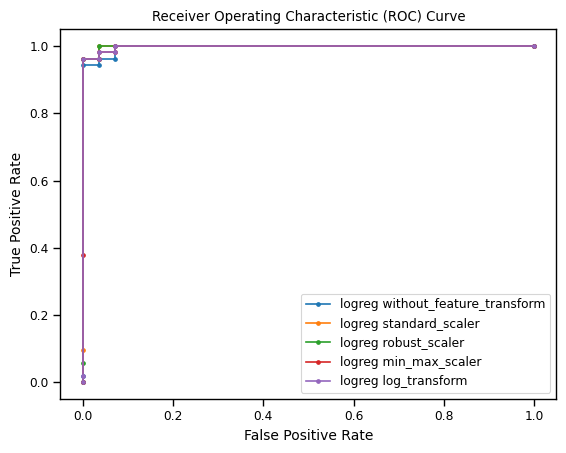

<Figure size 2000x1000 with 0 Axes>

Wall time: 3.28 s


In [91]:
%%time
run_classifier_pipelines_with_plot('logreg', LogisticRegression(),
                                   logreg_parameters,
                                   X_train_corr_fix, y_train_corr_fix,
                                   X_test_corr_fix, y_test_corr_fix)

## Decision Tree (High correlated features deleted)


===== dtree without_feature_transform =====

best estimator: Pipeline(steps=[('dtree',
                 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                                        random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        53

    accuracy                           0.98        81
   macro avg       0.97      0.98      0.97        81
weighted avg       0.98      0.98      0.98        81

ROC AUC: 0.9811320754716981

Log Loss: 0.027829771712467997


===== dtree standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('dtree',
                 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                                        random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

  

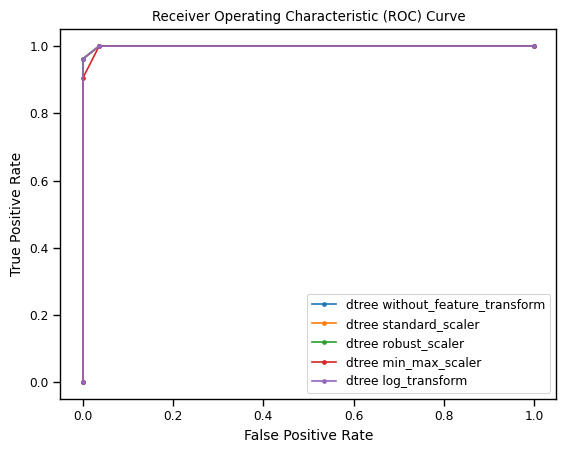

<Figure size 2000x1000 with 0 Axes>

Wall time: 1min 40s


In [92]:
%%time
run_classifier_pipelines_with_plot('dtree', DecisionTreeClassifier(),
                                   dtree_parameters,
                                   X_train_corr_fix, y_train_corr_fix,
                                   X_test_corr_fix, y_test_corr_fix)

## SVM Classifier (High correlated features deleted)


===== svc without_feature_transform =====

best estimator: Pipeline(steps=[('svc',
                 SVC(C=1000, gamma=0.0001, probability=True, random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.96      0.98      0.97        53

    accuracy                           0.96        81
   macro avg       0.96      0.95      0.96        81
weighted avg       0.96      0.96      0.96        81

ROC AUC: 0.9548517520215634

Log Loss: 0.12257748616384319


===== svc standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc',
                 SVC(C=100, kernel='linear', probability=True,
                     random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0

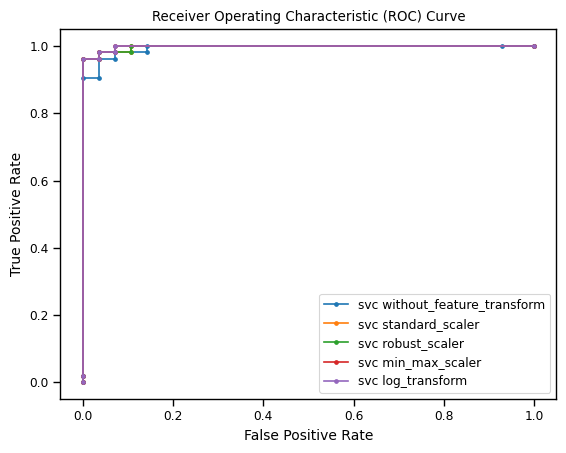

<Figure size 2000x1000 with 0 Axes>

Wall time: 2.81 s


In [93]:
%%time
run_classifier_pipelines_with_plot('svc', svm.SVC(probability=True),
                                   svc_parameters,
                                   X_train_corr_fix, y_train_corr_fix,
                                   X_test_corr_fix, y_test_corr_fix)

## Random Forest (High correlated features deleted)


===== rf without_feature_transform =====

best estimator: Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=2, max_features='sqrt',
                                        min_samples_leaf=10,
                                        random_state=42))])

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        53

    accuracy                           0.98        81
   macro avg       0.97      0.98      0.97        81
weighted avg       0.98      0.98      0.98        81

ROC AUC: 0.9811320754716981

Log Loss: 0.10436711116268302


===== rf standard_scaler =====

best estimator: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=2, max_features='sqrt',
                                        min_samples_leaf=10,
                                        r

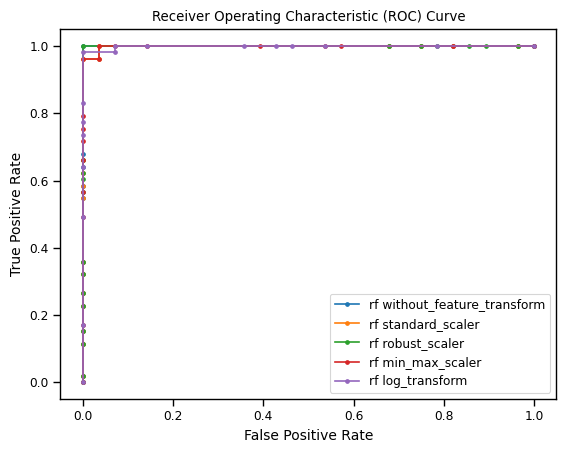

<Figure size 2000x1000 with 0 Axes>

Wall time: 34min 26s


In [94]:
%%time
run_classifier_pipelines_with_plot('rf', RandomForestClassifier(),
                                   rf_parameters,
                                   X_train_corr_fix, y_train_corr_fix,
                                   X_test_corr_fix, y_test_corr_fix)

# Comparison of metrics for all features / correlated features fixed

* KNN algorithm has improvements in metrics (in accuracy 1%) except of robust scaler case and log transform case
* Logistic Regression metrics are all better for all features case
* Decision Tree classification metrics are better for decreased number of features (for Standard Scaler and for log transformation) or the same as for all features
* SVM Classification has better metrics for all features case. Only in without transformations case less features bring better metrics
* Random Forest metrics are a bit better for decreased number of features, or the same

# Some boosting algorithms without parameters tuning

## Compare with Decision Tree with the best parameters

In [60]:
clf_base = DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=42)

In [61]:
clf_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=42)

In [62]:
y_pred = clf_base.predict(X_test)
y_pred_proba = clf_base.predict_proba(X_test)

In [65]:
show_classifier_metrics(y_test, y_pred, y_pred_proba)

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        53

    accuracy                           0.99        81
   macro avg       0.99      0.98      0.99        81
weighted avg       0.99      0.99      0.99        81

ROC AUC: 0.9821428571428572

Log Loss: 0.031186978076463576



## AdaBoost

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [67]:
base_estimator = DecisionTreeClassifier(max_depth=1,
                                        criterion='gini',
                                        splitter='best',
                                        min_samples_split=2)
model = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100)
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [68]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [69]:
show_classifier_metrics(y_test, y_pred, y_pred_proba)

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        53

    accuracy                           0.99        81
   macro avg       0.98      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81

ROC AUC: 0.9905660377358491

Log Loss: 0.057179644516830684



* AdaBoost algorithm shows a bit better metrics, but not ideal (even on a small dataset)
* AdaBoost is better on 1 class, while Decision Tree is better on 0 class

## Gradient boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbc = GradientBoostingClassifier(loss='deviance',
                                 learning_rate=0.1,
                                 n_estimators=100,
                                 subsample=1.0,
                                 criterion='friedman_mse',
                                 min_samples_split=2,
                                 min_samples_leaf=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)

In [73]:
show_classifier_metrics(y_test, y_pred, y_pred_proba)

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        53

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

ROC AUC: 1.0

Log Loss: 0.004373730938442914



* Gradient Boosting shows ideal metrics on test dataset

## XGBoost

In [74]:
import xgboost as xgb

In [75]:
params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}
xgb_clf = xgb.XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [76]:
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)

In [77]:
show_classifier_metrics(y_test, y_pred, y_pred_proba)

SCORES:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        53

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

ROC AUC: 1.0

Log Loss: 0.004373730938442914



* XGBoost shows the same result as Gradient Boost